In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import random

In [8]:
#Susenas 2012

susenas_ki = pd.read_csv('sn12_ki.csv', sep=',', low_memory=False)
susenas_krt = pd.read_csv('sn12_krt.csv', sep=',', low_memory=False)
susenas_m41p1 = pd.read_csv('sn12_m41p1.csv', sep=',', low_memory=False)
susenas_m41p2 = pd.read_csv('sn12_m41p2.csv', sep=',', low_memory=False)
susenas_m42 = pd.read_csv('sn12_m42.csv', sep=',', low_memory=False)
susenas_m43 = pd.read_csv('sn12_m43.csv', sep=',', low_memory=False)

In [10]:
susenas_ki.head()

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,343464.285714,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,570309.523810,55.252186


In [11]:
susenas_krt.head()

,URUT,B1R1,B1R2,B1R5,B1R8,B1R11,B2R1,B2R2,B2R3,B2R4,...,B8R2A,B8R2B,B8R2C,B8R3A,B8R3B,B9R1A,B9R1B,KABU,EXP_CAP,WERT
0,110112500101601,11,1,1,1,1,4,1,3,2,...,1,2.0,2.0,2,2,8,2,1101,3.434643e+05,45.876255
1,110112500101602,11,1,1,2,1,4,0,4,2,...,1,2.0,2.0,2,2,18,2,1101,5.703095e+05,55.252186
2,110112500101603,11,1,1,3,1,4,0,4,4,...,1,4.0,4.0,1,1,18,1,1101,1.305774e+06,20.006414
3,110112500101604,11,1,1,4,1,6,2,4,3,...,1,3.0,3.0,2,2,18,1,1101,4.017619e+05,42.398369
4,110112500101605,11,1,1,5,1,4,1,3,2,...,1,1.0,1.0,2,2,1,1,1101,7.000714e+05,43.420265


In [18]:
susenas_ki.head()

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,343464.285714,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,343464.285714,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,570309.523810,55.252186


In [12]:
susenas_ki.B5R34C2.unique()

array([nan,  0.,  2.,  3.,  1.,  4.,  5.,  6.,  8., 11.,  7.,  9., 10.])

In [22]:
total_pop=susenas_ki['WEIND'].sum()
print('{:,.0f}'.format(total_pop))

245,138,422


In [14]:
# Creating Count Statistics for Our Datasets
sus12_kr_desc = susenas_krt['URUT'].agg(['count','nunique']).transpose()
sus12_ki_desc = susenas_ki['URUT'].agg(['count','nunique']).transpose()

plot_describe = pd.concat([sus12_ki_desc,sus12_kr_desc],axis=1)
plot_describe.columns=['2012 Individu','2012 Ruta']
lst = list(plot_describe.columns)
for c in lst:
    plot_describe[c] = plot_describe[c].astype(int).apply(lambda x: f'{x:,}')
    
plot_describe
# The figure below explains why we choose only 2012 Susenas Data

,2012 Individu,2012 Ruta
count,"1,114,445","286,113"
nunique,"286,113","286,113"


In [ ]:
# Variabel yang dicari adalah jumlah anak

1. __b1r1__: Kode Provinsi 
2. __b1r2__: Kode Kabupaten
3. __b1r5__: Klasifikasi desa/kelurahan (apakah berstatus daerah perkotaan/pedesaan)
4. __b2r1__: Banyaknya anggota rumah tangga 
5. __b2r2__: Banyaknya anggota rumah tangga umur 0 – 4 tahun
6. __b2r3__: Banyaknya anggota rumah tangga umur 5 tahun ke atas
7. __b2r4__: Banyaknya anggota rumah tangga umur 10 tahun ke atas
8. __b2r5__: Banyaknya anggota rumah tangga umur 10 tahun ke atas yang bekerja selama 3 bulan terakhir
9. __exp_cap__: Pengeluaran per kapita

In [27]:
# Subsetting Dataset to Selected Variables
# Variabel yang dicari adalah jumlah anak

df_raw = susenas_krt[['URUT','B1R1','B1R2','B1R5', 'B2R1', 'B2R2', 'B2R3', 'B2R4', 'B2R5','EXP_CAP']]

# Creating District Identifier
df_raw=df_raw.assign(bps_2009=df_raw['B1R1']*100+df_raw['B1R2'])
df_raw.head()

,URUT,B1R1,B1R2,B1R5,B2R1,B2R2,B2R3,B2R4,B2R5,EXP_CAP,bps_2009
0,110112500101601,11,1,1,4,1,3,2,1,3.434643e+05,1101
1,110112500101602,11,1,1,4,0,4,2,1,5.703095e+05,1101
2,110112500101603,11,1,1,4,0,4,4,2,1.305774e+06,1101
3,110112500101604,11,1,1,6,2,4,3,1,4.017619e+05,1101
4,110112500101605,11,1,1,4,1,3,2,2,7.000714e+05,1101


In [28]:
df_raw.describe()

,URUT,B1R1,B1R2,B1R5,B2R1,B2R2,B2R3,B2R4,B2R5,EXP_CAP,bps_2009
count,2.861130e+05,286113.000000,286113.000000,286113.000000,286113.000000,286113.000000,286113.000000,286113.000000,286113.000000,2.861130e+05,286113.000000
mean,4.191669e+14,41.696068,21.884123,1.570586,3.895122,0.359012,3.536103,3.120935,1.855417,7.132670e+05,4191.490886
std,2.416031e+14,24.184687,26.393038,0.494993,1.739939,0.583966,1.579867,1.401087,1.025095,8.526552e+05,2416.025989
min,1.101125e+14,11.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,6.707492e+04,1101.000000
25%,1.808220e+14,18.000000,4.000000,1.000000,3.000000,0.000000,2.000000,2.000000,1.000000,3.272268e+05,1808.000000
50%,3.504125e+14,35.000000,9.000000,2.000000,4.000000,0.000000,3.000000,3.000000,2.000000,5.044419e+05,3504.000000
75%,6.303220e+14,63.000000,24.000000,2.000000,5.000000,1.000000,4.000000,4.000000,2.000000,8.231488e+05,6303.000000
max,9.471220e+14,94.000000,79.000000,2.000000,30.000000,7.000000,23.000000,18.000000,13.000000,7.529981e+07,9471.000000


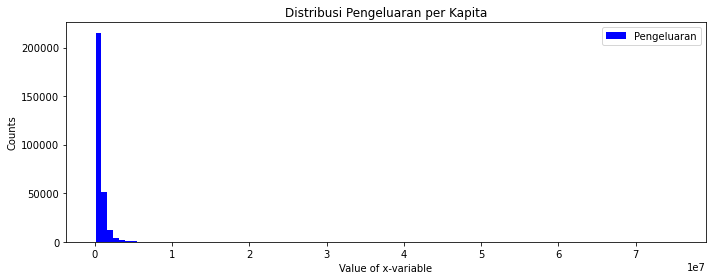

In [33]:
# Histogram for Age Variable
plot_umur = df_raw['EXP_CAP']

plot_umur.plot.hist(grid=False, bins=99, rwidth=1,color='blue',label='Pengeluaran')
plt.title('Distribusi Pengeluaran per Kapita')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()